In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [2]:
# Load data
iris = datasets.load_iris()
X=iris.data[0:99,:2]
y=iris.target[0:99]

In [3]:
# batch gradient decent    
def Batch_GD (Learning_Rate,num_iterations,X,y):
    N=len(X)
    w=np.zeros((X.shape[1],1))
    b=0
    costs=[]
    for i in range(num_iterations):
        #Sigmoid Function
        Z=np.dot(w.T,X.T)+b
        y_pred=1/(1+1/np.exp(Z))
        
        # Loss Function
        cost=-(1/N)*np.sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))
        
        #Calculate Gradient
        dw=1/N*np.dot(X.T,(y_pred-y).T)
        db=1/N*np.sum(y_pred-y)
        
        #Update w & b
        w = w - Learning_Rate * dw
        b = b - Learning_Rate * db
        
        # Records cost
        if i % 1000 == 0:
            costs.append(cost)
            #print(cost)
    return(w,b,costs)
# Run a function
Result_BatchGD=Batch_GD(Learning_Rate=0.01,num_iterations=100000,X=X,y=y)

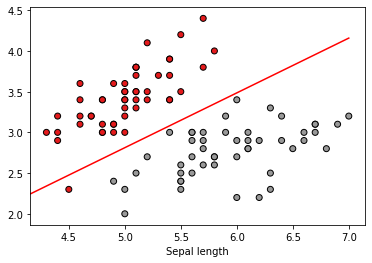

In [4]:
# Plot linear classification
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k')
line_B_GD=mlines.Line2D([0,7],[-0.5527,4.1577],color='red')
ax.add_line(line_B_GD)
ax.set_xlabel('Sepal length')
plt.show()